<a href="https://colab.research.google.com/github/Eric428-a/-LMS-Learning-Management-System/blob/master/1_2_2_b_Heart_Disease_Prediction_using_Decision_Trees_Starter_Kit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# Import the neccessary working libraries

In [8]:
import pandas as pd  # Pandas is used for data manipulation and analysis

In [9]:
import seaborn as sns  # Seaborn is a library for statistical data visualization

In [10]:
import matplotlib.pyplot as plt  # Matplotlib is a plotting library

In [11]:
import numpy as np  # NumPy is a library for numerical computations

In [12]:
from sklearn.model_selection import train_test_split  # For splitting the dataset

In [13]:
from sklearn.tree import DecisionTreeClassifier  # Decision Tree classifier

In [14]:
from sklearn.metrics import confusion_matrix, classification_report  # For model evaluation

In [15]:
from scipy import stats  # For statistical functions

In [16]:
import joblib  # For saving the model

# Step 1: Data Collection

In [17]:
# URL for the dataset

In [18]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

In [19]:
# Load the dataset from the provided URL

In [20]:
data = pd.read_csv(url, header=None)

# Step 2: Exploratory Data Analysis (EDA)

In [21]:
# Displaying the first few rows of the dataset

In [22]:
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
     0    1    2      3      4    5    6      7    8    9    10   11   12  13
0  63.0  1.0  1.0  145.0  233.0  1.0  2.0  150.0  0.0  2.3  3.0  0.0  6.0   0
1  67.0  1.0  4.0  160.0  286.0  0.0  2.0  108.0  1.0  1.5  2.0  3.0  3.0   2
2  67.0  1.0  4.0  120.0  229.0  0.0  2.0  129.0  1.0  2.6  2.0  2.0  7.0   1
3  37.0  1.0  3.0  130.0  250.0  0.0  0.0  187.0  0.0  3.5  3.0  0.0  3.0   0
4  41.0  0.0  2.0  130.0  204.0  0.0  2.0  172.0  0.0  1.4  1.0  0.0  3.0   0


In [23]:
# Displaying column names

In [24]:
print("\nColumn names:")
print(data.columns)


Column names:
Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], dtype='int64')


In [25]:
# Displaying data types of each column

In [26]:
print("\nData types:")
print(data.dtypes)


Data types:
0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11     object
12     object
13      int64
dtype: object


In [27]:
# Displaying number of rows and columns in the dataset

In [28]:
print("\nNumber of rows:", data.shape[0])
print("Number of columns:", data.shape[1])


Number of rows: 303
Number of columns: 14


In [29]:
# Checking for missing values

In [30]:
print("\nMissing values:")
print(data.isnull().sum())


Missing values:
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
dtype: int64


In [31]:
# Providing a statistical summary of the dataset

In [32]:
print("\nStatistical summary:")
print(data.describe())
print("\nData Collection: Completed")  # Description of what happened in this block


Statistical summary:
               0           1           2           3           4           5   \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

               6           7           8           9           10          13  
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000  
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.937294  
std     


# Step 3: Data Preprocessing

In [33]:
# Replace '?' with NaN

In [34]:
data.replace('?', np.nan, inplace=True)

In [35]:
# Convert columns to numeric

In [36]:
data = data.apply(pd.to_numeric)

In [37]:
# Handling missing values by replacing them with the mean

In [38]:
data.fillna(data.mean(), inplace=True)

In [39]:
# Data Visualization

In [40]:
# Correlation heatmap to visualize relationships between features

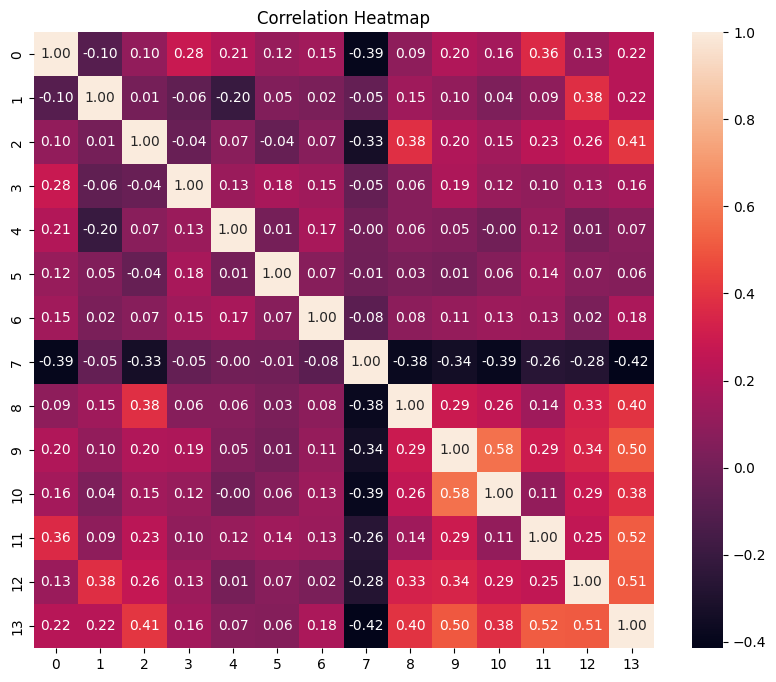

Visualizing correlation between features using a heatmap.


In [41]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
print("Visualizing correlation between features using a heatmap.")

In [42]:
# Box plots for each feature to visualize distribution and identify outliers

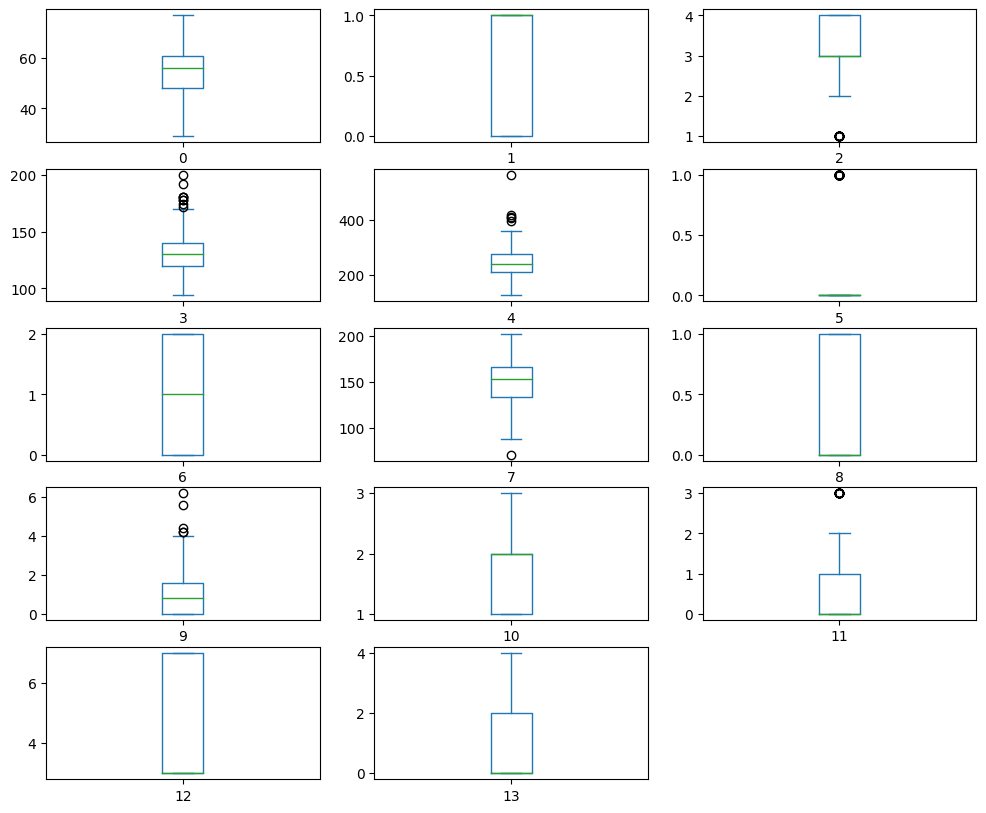

Visualizing distribution and outliers for each feature using box plots.


In [43]:
data.plot(kind='box', subplots=True, layout=(5, 3), figsize=(12, 10))
plt.title("Box Plots for Features")
plt.show()
print("Visualizing distribution and outliers for each feature using box plots.")

# Step 4: Model Training

In [44]:
# Split the dataset into features and target variable

In [45]:
X = data.drop(data.columns[-1], axis=1)  # Features

In [46]:
y = data[data.columns[-1]]  # Target variable

In [47]:
# Split the dataset into training and test sets

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
# Initialize the Decision Tree model

In [50]:
dtree = DecisionTreeClassifier(random_state=42)

In [51]:
# Fit the model

In [52]:
dtree.fit(X_train, y_train)
print("Training the Decision Tree classifier model.")

Training the Decision Tree classifier model.


# Step 5: Model Evaluation

In [53]:
# Predict on the test set

In [54]:
y_pred = dtree.predict(X_test)

In [55]:
# Confusion matrix to evaluate model performance

In [56]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[23  1  4  1  0]
 [ 4  3  4  1  0]
 [ 1  1  4  2  1]
 [ 1  4  1  0  1]
 [ 1  1  0  2  0]]


In [57]:
# Classification report for detailed performance metrics

In [58]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.79      0.78        29
           1       0.30      0.25      0.27        12
           2       0.31      0.44      0.36         9
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         4

    accuracy                           0.49        61
   macro avg       0.27      0.30      0.28        61
weighted avg       0.47      0.49      0.48        61



# Step 6: Conclusion

In [59]:
print("\nConclusion:")
print("In conclusion, we have successfully walked through the steps of a machine learning project for heart disease prediction using Decision Trees.")
print("The exploratory data analysis provided insights into the dataset, the Decision Tree model was trained, and its performance was evaluated.")
print("Remember to always save your model for future use.")


Conclusion:
In conclusion, we have successfully walked through the steps of a machine learning project for heart disease prediction using Decision Trees.
The exploratory data analysis provided insights into the dataset, the Decision Tree model was trained, and its performance was evaluated.
Remember to always save your model for future use.


# Step 7: Saving the model

In [61]:
joblib.dump(dtree, 'heart_disease_decision_tree_model.pkl')
print("The trained model has been saved as 'heart_disease_decision_tree_model.pkl'.")

The trained model has been saved as 'heart_disease_decision_tree_model.pkl'.


In [62]:
# Citations

In [63]:
print("\nCitations:")
print("[1] https://archive.ics.uci.edu/ml/datasets/heartdisease")
print("[2] https://www.semanticscholar.org/paper/95d8ec70f8aa3452d095fe89c7b5a072731b472c")


Citations:
[1] https://archive.ics.uci.edu/ml/datasets/heartdisease
[2] https://www.semanticscholar.org/paper/95d8ec70f8aa3452d095fe89c7b5a072731b472c
